In [ ]:
import numpy as np

In [ ]:
#Here, we implement the Gauss-Seidel iterative method for approximating the solution to a sytem of linear equations. This particular implementation of
#the algorithm assumes we have an analytical solution, so it is mainly used to facilitate understanding of the algorithm. A more practical implementation
#can be found following this cell.

def Gauss_Seidel(x0,A,b,xstar,max_iter=1000):
  #Changing vectors and matrices to have type float to support detailed computations
  A=A.astype(float)
  x0=x0.astype(float)
  b=b.astype(float)
  xstar=xstar.astype(float)
  
  #Decomposing A into the L+U+D decomposition
  L=np.tril(A)
  np.fill_diagonal(L,0)
  U=np.triu(A)
  np.fill_diagonal(U,0)
  D=np.triu(np.tril(A))
  
  #Creating x_(k+1) vector
  xkp1=x0
  
  #Calculating initial error
  err=np.linalg.norm(xkp1-xstar)

  errs=[]
  #Starting iterations
  while err>.00001:
    for row in range(A.shape[0]):
      xkp1[row]=-np.dot(L[row],xkp1)-np.dot(U[row],xkp1)+b[row]
      xkp1[row]=np.dot(np.linalg.inv(D)[row],xkp1)
    #Checking error
    err=np.linalg.norm(xkp1-xstar)
    errs.append(err)
    #print(f'The error is {err}')

  return xkp1,errs


In [ ]:
x0=np.transpose(np.array([[1,1,0]]))
A=np.array([[3,-1,1],[0,2,1],[-1,1,4]])
b=np.transpose(np.array([[-1,0,1]]))
xstar=np.transpose(np.array([[-5/12,-1/12,1/6]]))
Answer,errs=Gauss_Seidel(x0,A,b,xstar)
print(Answer)

[[-0.41597343]
 [-0.08305302]
 [ 0.1667699 ]]


In [ ]:
#Here, we make some changes to the implementation above so the algorithm can be used more practically. We alter the function so the user specifies a 
#threshold to tell the algorithm to stop when the norm of the difference between two consecutive iterations is small enough
def Prac_Gauss_Seidel(x0,A,b,eps,max_iter):
  #Changing vectors and matrices to have type float to support detailed computations
  A=A.astype(float)
  x0=x0.astype(float)
  b=b.astype(float)
  
  #Decomposing A into the L+U+D decomposition
  L=np.tril(A)
  np.fill_diagonal(L,0)
  U=np.triu(A)
  np.fill_diagonal(U,0)
  D=np.triu(np.tril(A))
  
  #Creating x_(k+1) vector
  xkp1=x0
  xk=np.zeros(x0.shape,dtype=float)
  err=eps+1
  iter=0
  #Starting iterations
  while err>eps:
    for row in range(A.shape[0]):
      xkp1[row]=-np.dot(L[row],xkp1)-np.dot(U[row],xkp1)+b[row]
      xkp1[row]=np.dot(np.linalg.inv(D)[row],xkp1)
    err=np.linalg.norm(xkp1-xk)
    xk=np.copy(xkp1)

    iter=iter+1
    if iter==max_iter:
      return xkp1
    

  return xkp1


In [ ]:
#We use the same matrix as an example
x0=np.transpose(np.array([[1,1,0]]))
A=np.array([[3,-1,1],[0,2,1],[-1,1,4]])
b=np.transpose(np.array([[-1,0,1]]))
xstar=np.transpose(np.array([[-5/12,-1/12,1/6]]))
Answer=Prac_Gauss_Seidel(x0,A,b,.0001,100)
print(Answer)

[[-0.41669309]
 [-0.08334716]
 [ 0.16666352]]


In [ ]:
#But how does this method differ from the Jacobi method, and which is faster?
def Prac_Jacobi(x0,A,b,eps,max_iter):
  A=A.astype(float)
  x0=x0.astype(float)
  b=b.astype(float)
  D=np.triu(np.tril(A))
  xk=np.zeros(x0.shape)
  xkm1=x0

  iter=0
  err=eps+1
  while err>eps:
    xk=xkm1+np.matmul(np.linalg.inv(D),b-np.matmul(A,xkm1))
    iter=iter+1
    if iter==max_iter:
      return xk
    err=np.linalg.norm(xk-xkm1)
    xkm1=np.copy(xk)


  return xk

def Jacobi(x0,A,b,xstar,max_iter):
  A=A.astype(float)
  x0=x0.astype(float)
  b=b.astype(float)
  D=np.triu(np.tril(A))
  xk=np.zeros(x0.shape)
  xkm1=x0
  err=np.linalg.norm(xkm1-xstar)
  errs=[]

  iter=0
  while err>.00001:
    xk=xkm1+np.matmul(np.linalg.inv(D),b-np.matmul(A,xkm1))
    err=np.linalg.norm(xk-xstar)
    errs.append(err)
    xkm1=np.copy(xk)
    iter=iter+1
    if iter==max_iter:
      return xk,errs


  return xk,errs

In [ ]:
#Implementing a practical representation of the jacobi method
x0=np.transpose(np.array([[1,1,0]]))
A=np.array([[3,-1,1],[0,2,1],[-1,1,4]])
b=np.transpose(np.array([[-1,0,1]]))
xstar=np.transpose(np.array([[-5/12,-1/12,1/6]]))
Answer=Prac_Jacobi(x0,A,b,.0001,100)
print(Answer)

[[-0.41668902]
 [-0.08333974]
 [ 0.16667646]]


In [ ]:
#Here, we compare the speeds at which Jacobi and Gauss-Seidel Converge while finding a
#solution to the same system of linear equations

A=np.array([[20,6,9,-1],[5,40,7,11],[8,6,21,2],[8,9,10,37]])
b=np.transpose(np.array([[1,2,5,-5]]))
xstar=np.transpose(np.array([[-6961/65331,32429/457317,127087/457317,-5500/26901]]))
x0=np.transpose(np.array([[1,2,3,4]]))
#jacSol=Jacobi(x0,A,b,xstar)
jacobi_sol,jacobi_errs=Jacobi(x0,A,b,xstar,max_iter=1000)
gaus_sol,gauss_errs=Gauss_Seidel(x0,A,b,xstar)

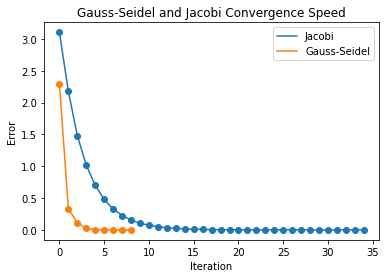

In [ ]:
import matplotlib.pyplot as plt
jxvals=np.arange(0,len(jacobi_errs))
gxvals=np.arange(0,len(gauss_errs))
fig=plt.figure()
ax=plt.axes()
ax.set_xlabel('Iteration')
ax.set_ylabel('Error')
ax.set_title('Gauss-Seidel and Jacobi Convergence Speed')
ax.plot(jxvals,jacobi_errs,label='Jacobi')
ax.plot(gxvals,gauss_errs,label='Gauss-Seidel')
ax.scatter(jxvals,jacobi_errs)
ax.scatter(gxvals,gauss_errs)
ax.legend(loc='upper right')
#Here, we can see that the Gauss-Seidel method converges to a solution nearly 4 times faster in this case. This is because the ith value of the
#solution vector is being used to calculate the i+1th value of the solution vector which is not the case in the jacobi method.